# SPH6004_assignment1_TXT

## 0. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from genetic_selection import GeneticSelectionCV
from sklearn.model_selection import train_test_split

## 1. Load Data and Brief  Analysis

In [2]:
df = pd.read_csv('./Assignment_1_data.csv')
df

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_indirect_min,urineoutput,sofa_respiration,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,M,54.550390,93.0,115.0,103.500000,57.0,100.0,82.733333,87.0,163.0,...,NaN,3459.0,2.0,0.0,NaN,1.0,0.0,1.0,3,False
1,M,86.324653,50.0,61.0,54.333333,61.0,93.0,71.695652,95.0,141.0,...,NaN,2020.0,NaN,1.0,NaN,1.0,1.0,1.0,8,False
2,M,40.270146,70.0,105.0,83.434783,66.0,92.0,76.695652,94.0,129.0,...,NaN,3050.0,NaN,1.0,0.0,1.0,1.0,0.0,4,False
3,M,73.383547,68.0,98.0,83.880000,74.0,101.0,84.694444,83.0,148.0,...,NaN,1592.0,NaN,0.0,NaN,0.0,0.0,1.0,6,False
4,M,70.724748,77.0,95.0,85.771429,30.0,90.0,62.657143,52.0,129.0,...,NaN,339.0,2.0,0.0,0.0,4.0,1.0,3.0,10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484,F,84.952721,59.0,80.0,68.538462,2.0,95.0,74.346154,109.0,152.0,...,NaN,697.0,NaN,0.0,0.0,1.0,4.0,1.0,10,False
36485,F,30.583263,59.0,104.0,79.954545,67.0,91.0,77.820000,94.0,140.0,...,NaN,2000.0,NaN,0.0,NaN,1.0,1.0,0.0,0,False
36486,F,60.095765,71.0,94.0,82.625000,51.0,92.0,61.772727,90.0,120.0,...,NaN,3500.0,NaN,0.0,NaN,1.0,0.0,0.0,3,False
36487,M,78.847051,63.0,86.0,72.836735,113.0,121.0,117.000000,148.0,219.0,...,NaN,1900.0,NaN,0.0,NaN,0.0,1.0,0.0,5,False


To convert a csv file into a dataframe for processing with pandas, we first need to figure out the amount of missing values in each columns,and consider how to handle the missing values in the table underlying the missing distribution.

In [3]:
#df.info()

In [4]:
df.describe()

,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,sbp_mean,...,bilirubin_indirect_max,bilirubin_indirect_min,urineoutput,sofa_respiration,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index
count,36489.000000,36417.000000,36417.000000,36417.000000,36401.000000,36401.000000,36401.000000,36343.000000,36343.000000,36343.000000,...,1544.000000,1544.000000,35073.000000,7587.000000,36235.000000,18590.000000,36402.000000,36468.000000,36467.000000,36489.000000
mean,65.907162,70.935003,103.109572,84.855578,60.429777,105.484634,79.255689,94.449898,147.691412,119.757827,...,1.855894,1.742163,1914.991284,1.723738,0.481109,0.514094,1.060381,0.915433,0.826501,5.798104
std,16.797498,15.064109,20.682937,15.977454,13.347348,23.346984,11.758700,16.705217,22.855348,17.220898,...,2.293747,2.219434,1266.887914,0.588464,0.825034,0.963752,0.972511,1.050761,1.201510,3.014789
min,18.002527,9.000000,36.000000,28.500000,0.830000,51.000000,42.513889,2.000000,49.000000,40.000000,...,0.100000,0.100000,-14850.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.549252,60.000000,88.000000,73.321429,53.000000,91.000000,70.896552,83.500000,132.000000,107.096464,...,0.500000,0.500000,1050.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000
50%,67.439033,70.000000,101.000000,83.500000,60.000000,102.000000,77.851852,93.000000,146.000000,117.678571,...,1.000000,1.000000,1667.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000
75%,78.729524,80.000000,115.000000,95.250000,68.000000,115.000000,86.382353,104.000000,161.000000,130.649616,...,2.200000,2.000000,2500.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000
max,102.865603,163.000000,295.000000,174.740741,133.000000,299.000000,151.529412,184.000000,352.000000,206.388889,...,21.200000,21.200000,31016.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,20.000000


### 1.1 check NaN Values

Columns with more than 100 missing values: 47
Columns with more than 500 missing values: 29
Columns with more than 5000 missing values: 26
Columns with more than 15000 missing values: 26
Columns with more than 20000 missing values: 15
Columns with more than 30000 missing values: 8
Columns with more than 50% missing rate: 15
Columns with more than 60% missing rate: 13
Columns with more than 70% missing rate: 13
Columns with more than 80% missing rate: 10
Columns with more than 90% missing rate: 6


Text(0.5, 0, '% missing')

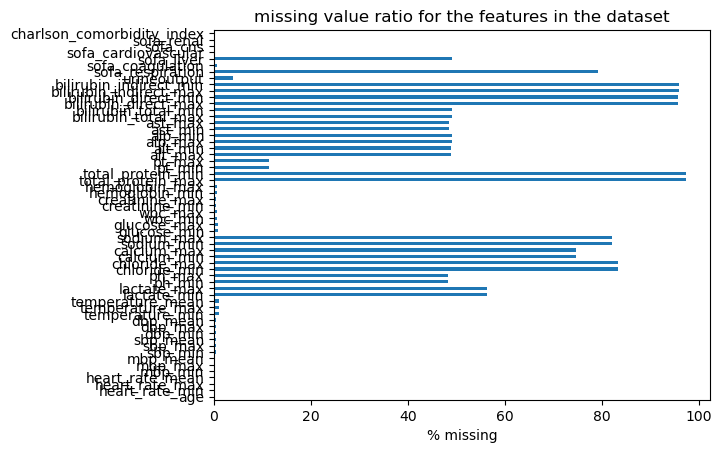

In [5]:
NaN_counts = df.isna().sum()
print(f"Columns with more than 100 missing values: {sum(NaN_counts > 100)}")
print(f"Columns with more than 500 missing values: {sum(NaN_counts > 500)}")
print(f"Columns with more than 5000 missing values: {sum(NaN_counts > 5000)}")
print(f"Columns with more than 15000 missing values: {sum(NaN_counts > 15000)}")
print(f"Columns with more than 20000 missing values: {sum(NaN_counts > 20000)}")
print(f"Columns with more than 30000 missing values: {sum(NaN_counts > 30000)}")
empty_percentages = df.isna().sum() / len(df) * 100
print(f"Columns with more than 50% missing rate: {sum(empty_percentages > 50)}")
print(f"Columns with more than 60% missing rate: {sum(empty_percentages > 60)}")
print(f"Columns with more than 70% missing rate: {sum(empty_percentages > 70)}")
print(f"Columns with more than 80% missing rate: {sum(empty_percentages > 80)}")
print(f"Columns with more than 90% missing rate: {sum(empty_percentages > 90)}")
#df.isnull().sum() / len(df) * 100
ax = empty_percentages[1:-1].plot.barh(title='missing value ratio for the features in the dataset')
ax.set_xlabel("% missing")

most of the columns missed more than 100 values, from 500 to 15000 missing values, the amount keeps stable at half of columns, then significantly changed to less than 15 when missing amount greater than 20000.
In a word, there are approximately 15 features' missing rate greater than 50% ,approximately 11 features' missing rate greater than 70% approximately 8 features' missing rate greater than 80%.

Since the difference in the number of features between 50% and 80% of the missing rate is small, you can try to remove the features between 50% and 70% to compare the difference, and if a few features greater than 50% are not critical, it can be removed.

### 1.2 show scatter chart

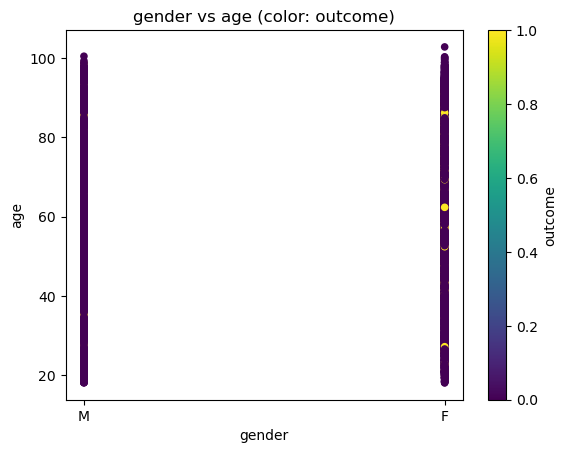

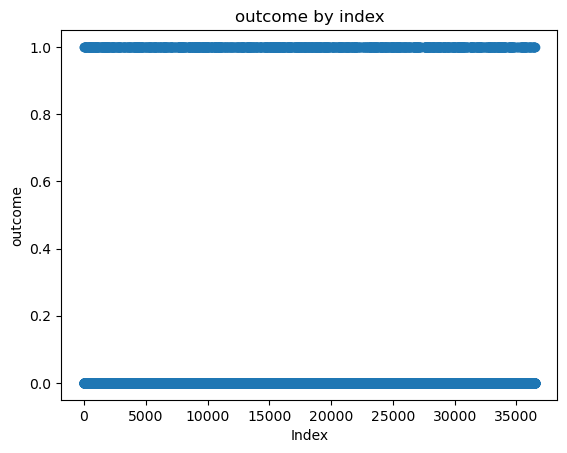

In [6]:
df['outcome'] = df['outcome'].astype(int)  # set the bool value (true or false) to 0/1

# Set x, y and z feature names
x_feature = "gender"
y_feature = "age"
z_feature = "outcome"
# Plotting point maps
fig, ax = plt.subplots()
df.plot.scatter(x=x_feature, y=y_feature, c=z_feature, cmap='viridis', ax=ax)
# Set graph title and axis labels
ax.set_title(f"{x_feature} vs {y_feature} (color: {z_feature})")
ax.set_xlabel(x_feature)
ax.set_ylabel(y_feature)
# Display Graphics
plt.show()

feature = 'outcome'
x = df.index.values
y = df[feature].values
plt.scatter(x, y)
plt.title(f'{feature} by index')
plt.xlabel('Index')
plt.ylabel(feature)
plt.show()

## 2. Data Pre-processing

### 2.1 Number convert and Set NaN Filter

In [7]:
# apart from "outcome" , "gender" also should be Convert to digital number,0 for'F',1 for 'M'
df['gender'] = df['gender'].replace(['F', 'M'], [0, 1])

# set a filter to select feature more than a set missing rate,get Flitered data.
F_df = df.loc[:, empty_percentages < 60]
F_df

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_total_max,bilirubin_total_min,urineoutput,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,1,54.550390,93.0,115.0,103.500000,57.0,100.0,82.733333,87.0,163.0,...,NaN,NaN,3459.0,0.0,NaN,1.0,0.0,1.0,3,0
1,1,86.324653,50.0,61.0,54.333333,61.0,93.0,71.695652,95.0,141.0,...,NaN,NaN,2020.0,1.0,NaN,1.0,1.0,1.0,8,0
2,1,40.270146,70.0,105.0,83.434783,66.0,92.0,76.695652,94.0,129.0,...,1.1,1.1,3050.0,1.0,0.0,1.0,1.0,0.0,4,0
3,1,73.383547,68.0,98.0,83.880000,74.0,101.0,84.694444,83.0,148.0,...,NaN,NaN,1592.0,0.0,NaN,0.0,0.0,1.0,6,0
4,1,70.724748,77.0,95.0,85.771429,30.0,90.0,62.657143,52.0,129.0,...,0.9,0.8,339.0,0.0,0.0,4.0,1.0,3.0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484,0,84.952721,59.0,80.0,68.538462,2.0,95.0,74.346154,109.0,152.0,...,0.6,0.5,697.0,0.0,0.0,1.0,4.0,1.0,10,0
36485,0,30.583263,59.0,104.0,79.954545,67.0,91.0,77.820000,94.0,140.0,...,NaN,NaN,2000.0,0.0,NaN,1.0,1.0,0.0,0,0
36486,0,60.095765,71.0,94.0,82.625000,51.0,92.0,61.772727,90.0,120.0,...,NaN,NaN,3500.0,0.0,NaN,1.0,0.0,0.0,3,0
36487,1,78.847051,63.0,86.0,72.836735,113.0,121.0,117.000000,148.0,219.0,...,NaN,NaN,1900.0,0.0,NaN,0.0,1.0,0.0,5,0


### 2.2 Data imputation

In [8]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
from sklearn.impute import SimpleImputer
#Instantiate an Imputer
imputer = SimpleImputer(strategy='median')
# Use Fit() to Calculate the magnitude of the correlation value of the X matrix
imputer.fit(F_df)
# Transform the data by replacing missing values with the mean value of the corresponding column
F_df = pd.DataFrame(imputer.transform(F_df),columns = F_df.columns)

F_df.to_csv('Assignment_1_puredata.csv', index=False)
F_df

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_total_max,bilirubin_total_min,urineoutput,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,1.0,54.550390,93.0,115.0,103.500000,57.0,100.0,82.733333,87.0,163.0,...,0.6,0.6,3459.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0
1,1.0,86.324653,50.0,61.0,54.333333,61.0,93.0,71.695652,95.0,141.0,...,0.6,0.6,2020.0,1.0,0.0,1.0,1.0,1.0,8.0,0.0
2,1.0,40.270146,70.0,105.0,83.434783,66.0,92.0,76.695652,94.0,129.0,...,1.1,1.1,3050.0,1.0,0.0,1.0,1.0,0.0,4.0,0.0
3,1.0,73.383547,68.0,98.0,83.880000,74.0,101.0,84.694444,83.0,148.0,...,0.6,0.6,1592.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0
4,1.0,70.724748,77.0,95.0,85.771429,30.0,90.0,62.657143,52.0,129.0,...,0.9,0.8,339.0,0.0,0.0,4.0,1.0,3.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484,0.0,84.952721,59.0,80.0,68.538462,2.0,95.0,74.346154,109.0,152.0,...,0.6,0.5,697.0,0.0,0.0,1.0,4.0,1.0,10.0,0.0
36485,0.0,30.583263,59.0,104.0,79.954545,67.0,91.0,77.820000,94.0,140.0,...,0.6,0.6,2000.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
36486,0.0,60.095765,71.0,94.0,82.625000,51.0,92.0,61.772727,90.0,120.0,...,0.6,0.6,3500.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0
36487,1.0,78.847051,63.0,86.0,72.836735,113.0,121.0,117.000000,148.0,219.0,...,0.6,0.6,1900.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0


 ### 2.3 multicollinear features 

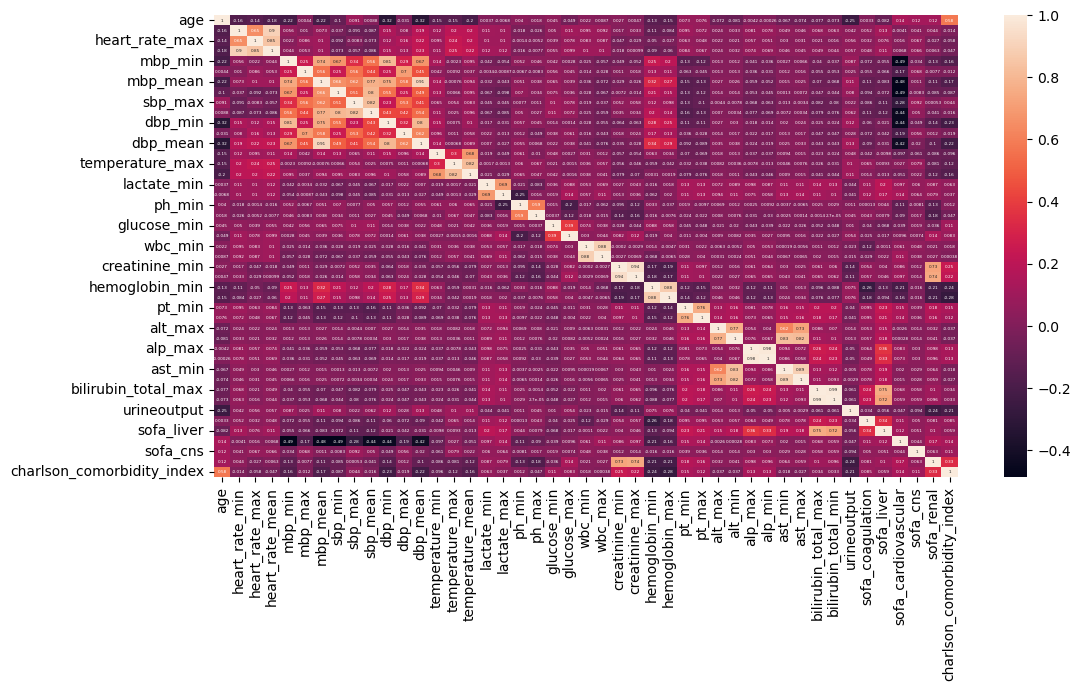

In [9]:
P_df = pd.read_csv('./Assignment_1_puredata.csv')
y = P_df.iloc[:, -1].values  #Take the last column, i.e. output
# calculate pearson correlation between features
var_cor = P_df.iloc[:, 1:-1].corr()
plt.figure(figsize=[12, 6])
sns.heatmap(var_cor, annot=True, annot_kws={"fontsize":3})
plt.show()

This heat map shows data with a high degree of covariance, to handle multicollinear features ,Consider using regularization methods such as ridge regression or Lasso regression    

### 2.4Visualization

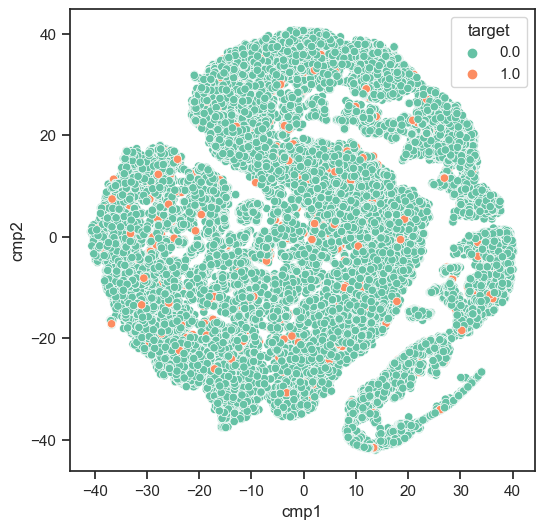

In [10]:
from sklearn import preprocessing
#X_norm = preprocessing.scale(P_df)
from sklearn.decomposition import PCA
# visulization
from MulticoreTSNE import MulticoreTSNE as TSNE
import seaborn as sns; sns.set()
tsne = TSNE(n_jobs=4)
X_tsne = tsne.fit_transform(P_df)
data_frame_rd = pd.DataFrame(data=X_tsne,columns=['cmp1','cmp2'])
data_frame_rd['target'] = y
fig = plt.figure(figsize=(6,6))
sns.set_context("paper")
sns.set(font_scale=1)
sns.set_style("ticks")
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="cmp1", y="cmp2", data=data_frame_rd,hue="target",
                     hue_norm=(0, 1),
                     palette="Set2",legend='brief')

From the figure, we can see that the output of the data set has a large imbalance problem.Flase(0)Output Significantly more than True(1)output.Consider using OverSampling

### 2.5 Dataset split

In [11]:
from sklearn.model_selection import train_test_split
# input and output
x = P_df.iloc[:,:-1]
y = P_df.iloc[:,-1]
# Split dataset into training and testing set after feature selection
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(29191, 46)
(29191,)
(7298, 46)
(7298,)


### 2.5 Standardization/Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

# # 假设 X_train 是训练集特征，X_test 是测试集特征
# # 先实例化一个StandardScaler对象
# scaler = StandardScaler()
# 
# # 对训练集特征进行标准化
# X_train_scaled = scaler.fit_transform(X_train)
# 
# # 对测试集特征进行标准化
# X_test_scaled = scaler.transform(X_test)

In [13]:
# X_train_scaleddf = pd.DataFrame(X_train_scaled,columns = X_train.columns)
# X_train_scaleddf

In [14]:
# X_test_scaleddf = pd.DataFrame(X_test_scaled,columns = X_test.columns)
# X_test_scaleddf

### 2.6 Oversampling/SMOTE

In [15]:
from imblearn.over_sampling import SMOTE

# X和y分别为训练集的特征和标签
smote = SMOTE(random_state=42) # 初始化SMOTE对象
X_resampled, y_resampled = smote.fit_resample(X_train, y_train) # 进行过采样

In [16]:
print(X_resampled.shape)
print(y_resampled.shape)

(56262, 46)
(56262,)


## 3.Feature Selection

### 3.1 GeneticSelection algrithom

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier(n_estimators=60)
#lrc_l2 = LogisticRegression(penalty='l2', solver='saga')
selector = GeneticSelectionCV(estimator= rfc,
                              cv=5,
                              verbose=1,
                              scoring="f1",
                              max_features=30,
                              n_population=30,
                              crossover_proba=0.5,
                              mutation_proba=0.2,
                              n_generations=50,
                              crossover_independent_proba=0.5,
                              mutation_independent_proba=0.05,
                              tournament_size=3,
                              caching=True,
                              n_jobs=-1)
# Select the best features using the genetic algorithm
selector = selector.fit(X_resampled,y_resampled)

# Select the features in the original dataset
selected_features = X_resampled.columns[selector.support_]
print("Selected features: ",selected_features)

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	30    	[  0.959572  14.766667   0.026608]	[ 0.035443  8.305353  0.005408]	[ 0.824322  1.        0.015164]	[  0.982755  28.         0.037714]
1  	19    	[-665.753418   22.166667  666.690957]	[ 2494.682334     5.639641  2494.431766]	[-10000.            6.            0.016279]	[     0.982755     31.        10000.      ]
2  	8     	[  0.981004  24.433333   0.024284]   	[ 0.001612  2.906124  0.004455]         	[  0.975604  16.         0.016279]         	[  0.982755  28.         0.034553]         
3  	15    	[-332.383988   25.7       333.356571]	[ 1795.231225     2.491987  1795.050621]	[-10000.           20.            0.018108]	[     0.983633     32.        10000.      ]
4  	15    	[  0.982477  26.533333   0.022537]   	[ 0.001058  2.232089  0.004048]         	[  0.97928  21.        0.01605]            

45 	20    	[-665.746471   30.033333  666.682998]   	[ 2494.684191     0.546707  2494.433893]	[-10000.           28.            0.016217]	[     0.986718     32.        10000.      ]
46 	17    	[-665.746465   30.        666.68319 ]   	[ 2494.684192     0.365148  2494.433842]	[-10000.           29.            0.016217]	[     0.986718     31.        10000.      ]
47 	20    	[  0.985997  29.933333   0.01747 ]      	[ 0.000452  0.249444  0.000496]         	[  0.985125  29.         0.016217]         	[  0.986718  30.         0.018483]         
48 	18    	[-2332.577454    30.166667  2333.346818]	[ 4229.942848     0.897527  4229.518408]	[-10000.          28.           0.01556]   	[     0.986718     32.        10000.      ]
49 	17    	[  0.985886  29.433333   0.017421]      	[ 0.000634  1.054619  0.001052]         	[  0.983838  26.         0.014377]         	[  0.986718  30.         0.020622]         
50 	15    	[-332.380213   30.033333  333.350389]   	[ 1795.231926     0.406885  1795.051769]	[-

In [18]:
print(len(selected_features))

30


round1
Trial1:  Selected features:  Index(['sbp_min', 'dbp_mean', 'glucose_min', 'alt_max', 'alt_min', 'alp_max',
       'ast_max'],
      dtype='object')
Trial2:  Selected features:  Index(['mbp_min', 'wbc_max', 'bilirubin_total_max', 'sofa_cns', 'sofa_renal',
       'charlson_comorbidity_index'],
      dtype='object')

round 2
Trial1: Selected features:  Index(['heart_rate_mean', 'sbp_min', 'sbp_max', 'sbp_mean', 'dbp_max',
       'dbp_mean', 'temperature_min', 'wbc_min', 'hemoglobin_max', 'pt_min',
       'pt_max', 'ast_max', 'urineoutput', 'sofa_cns',
       'charlson_comorbidity_index'],
      dtype='object')

Round3
Selected features:  Index(['heart_rate_mean', 'mbp_max', 'sbp_min', 'sbp_max', 'sbp_mean',
       'dbp_max', 'temperature_min', 'temperature_mean', 'lactate_min',
       'lactate_max', 'ph_max', 'glucose_min', 'glucose_max', 'wbc_min',
       'creatinine_max', 'hemoglobin_min', 'pt_min', 'pt_max', 'alt_max',
       'bilirubin_total_max', 'bilirubin_total_min', 'urineoutput',
       'sofa_coagulation', 'sofa_cns', 'sofa_renal',
       'charlson_comorbidity_index'],
      dtype='object')

round4
Selected features:  Index(['heart_rate_mean', 'mbp_min', 'mbp_max', 'mbp_mean', 'sbp_max',
       'dbp_min', 'dbp_max', 'dbp_mean', 'temperature_min', 'temperature_max',
       'temperature_mean', 'lactate_min', 'lactate_max', 'ph_max',
       'glucose_min', 'wbc_min', 'hemoglobin_min', 'hemoglobin_max', 'pt_max',
       'alt_min', 'alp_max', 'alp_min', 'ast_min', 'ast_max',
       'bilirubin_total_min', 'urineoutput', 'sofa_coagulation', 'sofa_cns',
       'sofa_renal', 'charlson_comorbidity_index'],
      dtype='object')

round5 RF
Selected features:  Index(['gender', 'age', 'heart_rate_min', 'heart_rate_max', 'heart_rate_mean',
       'mbp_min', 'mbp_max', 'mbp_mean', 'sbp_min', 'sbp_max', 'dbp_min',
       'dbp_max', 'dbp_mean', 'temperature_min', 'temperature_max',
       'temperature_mean', 'lactate_max', 'ph_min', 'ph_max', 'glucose_min',
       'glucose_max', 'wbc_min', 'wbc_max', 'creatinine_min', 'hemoglobin_min',
       'hemoglobin_max', 'pt_max', 'alp_max', 'urineoutput',
       'sofa_coagulation', 'sofa_liver', 'sofa_cardiovascular', 'sofa_renal',
       'charlson_comorbidity_index'],
      dtype='object')

### 3.2 Selected Feature

In [19]:
selected_df = X_resampled[selected_features]
selected_df

,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,sbp_max,sbp_mean,dbp_min,dbp_max,...,hemoglobin_max,pt_min,alt_max,alt_min,alp_max,ast_min,urineoutput,sofa_coagulation,sofa_renal,charlson_comorbidity_index
0,86.642808,47.000000,86.000000,67.685714,43.000000,97.000000,155.000000,113.848485,24.000000,80.000000,...,13.300000,13.800000,20.000000,20.000000,92.000000,47.000000,829.000000,0.000000,1.000000,9.000000
1,87.169076,68.000000,101.000000,88.400000,58.000000,101.000000,147.000000,116.560000,37.000000,89.000000,...,12.600000,12.400000,25.000000,23.000000,88.000000,31.000000,850.000000,0.000000,0.000000,8.000000
2,61.807684,69.000000,108.000000,89.291667,61.000000,112.000000,132.000000,105.000000,44.000000,104.000000,...,11.000000,11.900000,25.000000,23.000000,88.000000,31.000000,1475.000000,0.000000,0.000000,6.000000
3,39.497537,89.000000,117.000000,98.560000,61.000000,104.000000,147.000000,112.800000,48.000000,91.000000,...,12.100000,11.800000,25.000000,23.000000,88.000000,31.000000,840.000000,1.000000,2.000000,6.000000
4,22.443245,49.000000,100.000000,67.774194,69.000000,101.000000,152.000000,130.758621,57.000000,89.000000,...,13.900000,13.400000,14.000000,13.000000,59.000000,22.000000,4125.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56257,77.007354,74.523724,102.495075,85.200683,57.371531,90.685766,170.057297,131.143346,41.028649,77.476276,...,11.192390,13.431423,25.000000,22.723814,97.390330,32.380931,1278.457477,0.000000,1.000000,5.000000
56258,24.061629,93.924051,125.677215,112.092697,44.882911,96.924051,154.639240,122.355057,19.968355,78.727848,...,11.437342,21.991139,267.943036,170.848100,175.113924,239.386076,688.575949,3.000000,0.120253,1.360760
56259,59.952065,80.438594,118.088814,98.809781,60.679824,130.098682,198.487935,129.280910,47.689692,96.428726,...,11.348793,13.892105,24.009868,22.669956,85.689692,31.660088,1538.251099,0.000000,0.330044,4.330044
56260,51.049167,72.693336,84.000000,78.669143,72.914815,124.642225,164.625188,133.712811,59.931852,114.591114,...,9.817037,12.305111,28.812594,23.897779,69.710373,38.727410,2489.187406,1.965926,0.000000,2.965926


### Visualization

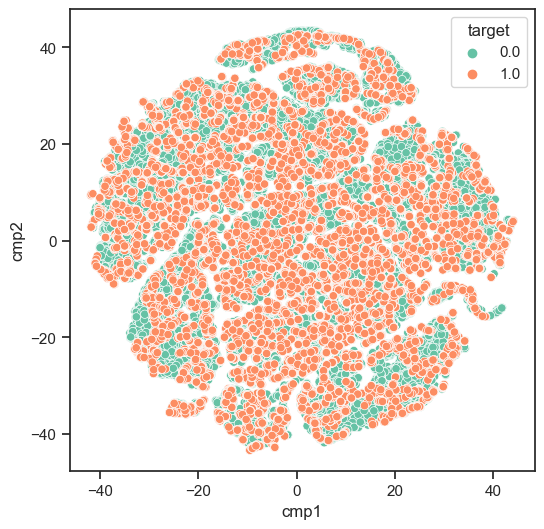

In [20]:
#X_norm = preprocessing.scale(selected_df)
#pca = PCA(n_components='mle')
#X_PCA = pca.fit_transform(X_norm)
#X_train, X_test, y_train, y_test = train_test_split(X_PCA, y_resampled, test_size=0.2, random_state=0)

# visulization
tsne = TSNE(n_jobs=4)
X_tsne = tsne.fit_transform(selected_df)
data_frame_rd = pd.DataFrame(data=X_tsne,columns=['cmp1','cmp2'])
data_frame_rd['target'] = y_resampled
fig = plt.figure(figsize=(6,6))
sns.set_context("paper")
sns.set(font_scale=1)
sns.set_style("ticks")
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="cmp1", y="cmp2", data=data_frame_rd,hue="target",
                     hue_norm=(0, 1),
                     palette="Set2",legend='brief')

## 4.Models

### 4.1 LogisticRegression

In [21]:
X_test_S = X_test[selected_features]
X_test_S

,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,sbp_max,sbp_mean,dbp_min,dbp_max,...,hemoglobin_max,pt_min,alt_max,alt_min,alp_max,ast_min,urineoutput,sofa_coagulation,sofa_renal,charlson_comorbidity_index
22866,53.333574,58.0,75.0,66.200000,94.0,120.0,184.0,161.958333,75.0,107.0,...,9.5,11.7,18.0,18.0,73.0,14.0,1667.0,0.0,4.0,6.0
28981,83.979645,72.0,135.0,90.080000,56.0,87.0,132.0,112.583333,43.0,79.0,...,15.0,11.7,175.0,126.0,178.0,297.0,1150.0,1.0,0.0,4.0
16232,55.168537,74.0,97.0,80.620690,45.0,86.0,126.0,99.160000,34.0,80.0,...,8.4,20.7,104.0,102.0,105.0,305.0,1120.0,0.0,2.0,9.0
2004,52.125316,113.0,140.0,122.760000,83.0,107.0,146.0,119.600000,72.0,95.0,...,9.6,16.5,26.0,22.0,188.0,77.0,1405.0,0.0,0.0,7.0
3380,78.472812,53.0,63.0,56.192308,50.0,76.0,127.0,101.280000,32.0,63.0,...,9.5,14.0,25.0,23.0,88.0,31.0,1700.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16095,86.453149,62.0,91.0,71.296296,56.0,97.0,146.0,113.600000,48.0,91.0,...,13.4,15.7,25.0,23.0,88.0,31.0,1449.0,1.0,1.0,6.0
1903,82.552982,70.0,87.0,76.250000,72.0,101.0,164.0,144.750000,57.0,86.0,...,9.2,16.4,179.0,127.0,649.0,65.0,1885.0,0.0,3.0,11.0
23807,83.944668,56.0,80.0,63.800000,51.0,101.0,216.0,158.136364,32.0,60.0,...,12.4,13.1,25.0,23.0,88.0,31.0,525.0,0.0,4.0,10.0
13802,78.793171,61.0,100.0,82.166667,60.0,156.0,168.0,148.727273,49.0,152.0,...,11.2,13.1,25.0,23.0,88.0,31.0,1290.0,1.0,0.0,8.0


### Cross-validation and grid_search

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
params = {'C': [0.01, 0.1, 1, 10, 100]}
logreg = LogisticRegression(max_iter = 10000)
grid_search = GridSearchCV(logreg, params, cv=5)
grid_search.fit(selected_df, y_resampled)
scores = cross_val_score(logreg, selected_df, y_resampled, cv=5)

# Print the cross-validation scores
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', scores.mean())

Cross-validation scores: [0.6042833  0.60072869 0.60264842 0.60726982 0.60131532]
Mean cross-validation score: 0.6032491110558692


In [23]:
LR_model = LogisticRegression()
LR_model.fit(selected_df, y_resampled)

D:\Tcode9\NUS\IT5006\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### LR_Model Evaluation

**Accuracy** / **Confusion Matrix**  / **Precision** / **Recall** / **F1 Score** / **ROC Curve and AUC**

Model:LogisticRegression 
Accuracy:  0.5676897780213758
confusion_matrix:
 [[3980 3049]
 [ 106  163]]
precision: 0.05074719800747198
recall: 0.6059479553903345
F1_score: 0.09365124964090779
Classification report:
               precision    recall  f1-score   support

         0.0       0.97      0.57      0.72      7029
         1.0       0.05      0.61      0.09       269

    accuracy                           0.57      7298
   macro avg       0.51      0.59      0.40      7298
weighted avg       0.94      0.57      0.69      7298



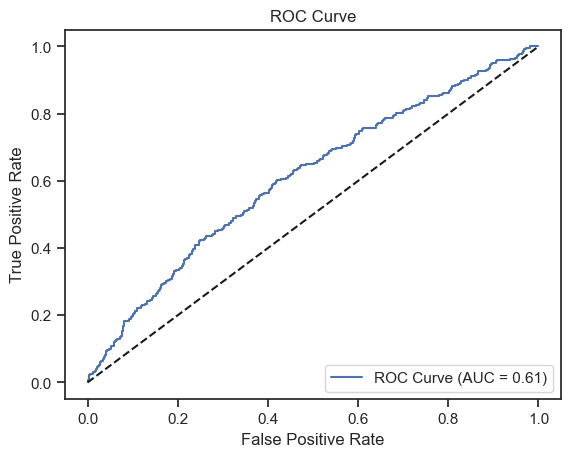

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

#Accuracy
y_pred_lr = LR_model.predict(X_test_S)
accuracy_lr = LR_model.score(X_test_S, y_test)

#混淆矩阵
from sklearn.metrics import confusion_matrix
# make predictions on the testing set and compute the confusion matrix
y_pred_lr = LR_model.predict(X_test_S)
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)

#准确率
from sklearn.metrics import precision_score
# make predictions on the testing set and compute the precision score
precision_lr = precision_score(y_test, y_pred_lr)

#召回率
from sklearn.metrics import recall_score
# make predictions on the testing set and compute the recall score
recall_lr = recall_score(y_test, y_pred_lr)

from sklearn.metrics import f1_score
# make predictions on the testing set and compute the F1 score
f1_lr = f1_score(y_test, y_pred_lr)

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
print("Model:LogisticRegression ")
print("Accuracy: ",accuracy_lr)
print("confusion_matrix:\n",confusion_matrix_lr)
print("precision:",precision_lr)
print("recall:",recall_lr)
print("F1_score:",f1_lr)
print('Classification report:\n', classification_report(y_test, y_pred_lr))
# compute the predicted probabilities and the AUC
y_pred_prob = LR_model.predict_proba(X_test_S)[:, 1]
auc = roc_auc_score(y_test, y_pred_prob)

# plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
# fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict_proba(X_test_S)[:,1])
# roc_auc = auc(fpr, tpr)
# print("AUC:", roc_auc)

### 4.2 Decision Tree

In [25]:
DT_model = DecisionTreeClassifier(max_depth=5, criterion='entropy')
DT_model.fit(selected_df, y_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

Model:Decision Tree 
Accuracy:  0.8480405590572759
confusion_matrix:
 [[6151  878]
 [ 231   38]]
precision: 0.04148471615720524
recall: 0.1412639405204461
F1_score: 0.06413502109704643
Classification report:
               precision    recall  f1-score   support

         0.0       0.96      0.88      0.92      7029
         1.0       0.04      0.14      0.06       269

    accuracy                           0.85      7298
   macro avg       0.50      0.51      0.49      7298
weighted avg       0.93      0.85      0.89      7298



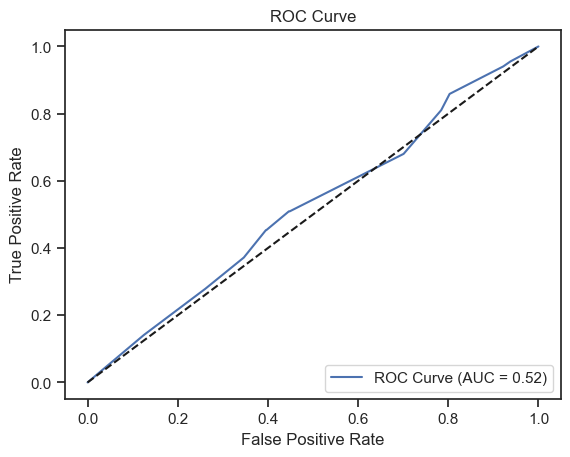

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

#Accuracy
y_pred_lr = DT_model.predict(X_test_S)
accuracy_lr = DT_model.score(X_test_S, y_test)

#混淆矩阵
from sklearn.metrics import confusion_matrix
# make predictions on the testing set and compute the confusion matrix
y_pred_lr = DT_model.predict(X_test_S)
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)

#准确率
from sklearn.metrics import precision_score
# make predictions on the testing set and compute the precision score
precision_lr = precision_score(y_test, y_pred_lr)

#召回率
from sklearn.metrics import recall_score
# make predictions on the testing set and compute the recall score
recall_lr = recall_score(y_test, y_pred_lr)

from sklearn.metrics import f1_score
# make predictions on the testing set and compute the F1 score
f1_lr = f1_score(y_test, y_pred_lr)

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
print("Model:Decision Tree ")
print("Accuracy: ",accuracy_lr)
print("confusion_matrix:\n",confusion_matrix_lr)
print("precision:",precision_lr)
print("recall:",recall_lr)
print("F1_score:",f1_lr)
print('Classification report:\n', classification_report(y_test, y_pred_lr))
# compute the predicted probabilities and the AUC
y_pred_prob = DT_model.predict_proba(X_test_S)[:, 1]
auc = roc_auc_score(y_test, y_pred_prob)

# plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
# fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict_proba(X_test_S)[:,1])
# roc_auc = auc(fpr, tpr)
# print("AUC:", roc_auc)

### 4.3 RandomForest

In [27]:
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(selected_df, y_resampled)

RandomForestClassifier()

Model:RandomForest 
Accuracy:  0.9613592765141135
confusion_matrix:
 [[3980 3049]
 [ 106  163]]
precision: 0.05074719800747198
recall: 0.6059479553903345
F1_score: 0.09365124964090779
Classification report:
               precision    recall  f1-score   support

         0.0       0.97      0.57      0.72      7029
         1.0       0.05      0.61      0.09       269

    accuracy                           0.57      7298
   macro avg       0.51      0.59      0.40      7298
weighted avg       0.94      0.57      0.69      7298



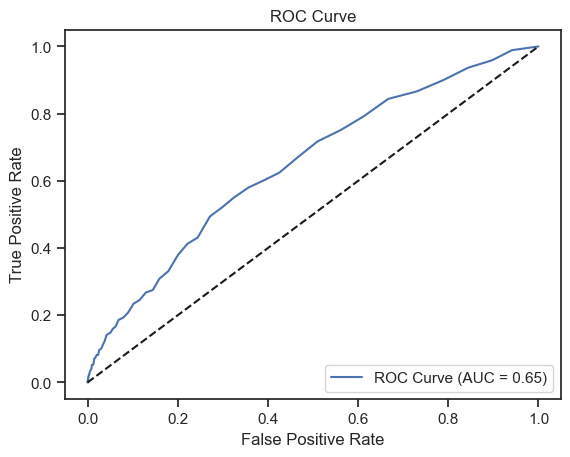

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

#Accuracy
y_pred_lr = RF_model.predict(X_test_S)
accuracy_lr = RF_model.score(X_test_S, y_test)

#混淆矩阵
from sklearn.metrics import confusion_matrix
# make predictions on the testing set and compute the confusion matrix
y_pred_lr = LR_model.predict(X_test_S)
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)

#准确率
from sklearn.metrics import precision_score
# make predictions on the testing set and compute the precision score
precision_lr = precision_score(y_test, y_pred_lr)

#召回率
from sklearn.metrics import recall_score
# make predictions on the testing set and compute the recall score
recall_lr = recall_score(y_test, y_pred_lr)

from sklearn.metrics import f1_score
# make predictions on the testing set and compute the F1 score
f1_lr = f1_score(y_test, y_pred_lr)

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
print("Model:RandomForest ")
print("Accuracy: ",accuracy_lr)
print("confusion_matrix:\n",confusion_matrix_lr)
print("precision:",precision_lr)
print("recall:",recall_lr)
print("F1_score:",f1_lr)
print('Classification report:\n', classification_report(y_test, y_pred_lr))
# compute the predicted probabilities and the AUC
y_pred_prob = RF_model.predict_proba(X_test_S)[:, 1]
auc = roc_auc_score(y_test, y_pred_prob)

# plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### SVM

In [29]:
#SVM_model = SVC(kernel='linear',probability=True)
#SVM_model.fit(selected_df, y_resampled)

### SVM_Model Evaluation

In [30]:
#Accuracy
y_predSVM = SVM_model.predict(X_test_S)
accuracySVM = SVM_model.score(X_test_S, y_test)
print("Accuracy: ",accuracySVM)

#混淆矩阵
from sklearn.metrics import confusion_matrix
# make predictions on the testing set and compute the confusion matrix
y_pred_SVM = SVM_model.predict(X_test_S)
confusion_matrix_SVM = confusion_matrix(y_test, y_pred_SVM)

#准确率
from sklearn.metrics import precision_score
# make predictions on the testing set and compute the precision score
precision_SVM = precision_score(y_test, y_pred_SVM)

#召回率
from sklearn.metrics import recall_score
# make predictions on the testing set and compute the recall score
recall_SVM = recall_score(y_test, y_pred_SVM)

from sklearn.metrics import f1_score
# make predictions on the testing set and compute the F1 score
f1_SVM = f1_score(y_test, y_pred_SVM)

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# compute the predicted probabilities and the AUC
y_pred_prob = SVM_model.predict_proba(X_test_S)[:, 1]
auc = roc_auc_score(y_test, y_pred_prob)

# plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("Accuracy: ",accuracy_SVM)
print("confusion_matrix:\n",confusion_matrix_SVM)
print("precision:",precision_SVM)
print("recall:",recall_SVM)
print("F1_score:",f1_SVM)

NameError: name 'SVM_model' is not defined